In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import math

Response: imdb_score

In [2]:
movies = pd.read_csv('movie_metadata.csv')
list(movies.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# IMDB SCORE
#### If score is above 75% quartile movie is good (1), else bad (0)

In [3]:
good_score = movies['imdb_score'].quantile(0.75)
movies['good_movie'] = movies['imdb_score'].apply(lambda x: 1 if x >= good_score else 0)

In [4]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681022
num_voted_users              0.364947
num_user_for_reviews         0.272405
movie_facebook_likes         0.232860
num_critic_for_reviews       0.221334
duration                     0.200878
gross                        0.165646
director_facebook_likes      0.163755
aspect_ratio                 0.066005
actor_2_facebook_likes       0.043753
cast_total_facebook_likes    0.042055
actor_1_facebook_likes       0.038629
actor_3_facebook_likes       0.027265
budget                       0.000898
facenumber_in_poster        -0.066470
title_year                  -0.197580
dtype: float64

In [5]:
missing_values_sum = movies.isna().sum()
print(missing_values_sum)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
good_movie                     0
dtype: int64


# EDA

### GENRE

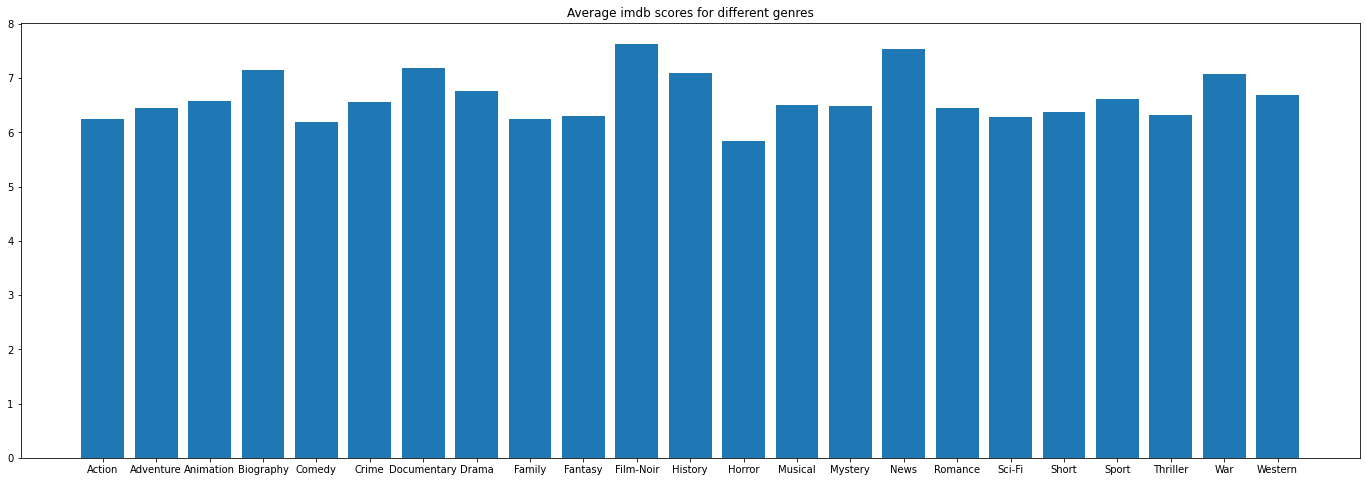

In [6]:
genres_df = movies.loc[:, ["genres", "imdb_score"]].copy()

genres_df["Action"] = [1 if "Action" in genre else 0 for genre in genres_df["genres"]]
genres_df["Adventure"] = [1 if "Adventure" in genre else 0 for genre in genres_df["genres"]]
genres_df["Animation"] = [1 if "Animation" in genre else 0 for genre in genres_df["genres"]]
genres_df["Biography"] = [1 if "Biography" in genre else 0 for genre in genres_df["genres"]]
genres_df["Comedy"] = [1 if "Comedy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Crime"] = [1 if "Crime" in genre else 0 for genre in genres_df["genres"]]
genres_df["Documentary"] = [1 if "Documentary" in genre else 0 for genre in genres_df["genres"]]
genres_df["Drama"] = [1 if "Drama" in genre else 0 for genre in genres_df["genres"]]
genres_df["Family"] = [1 if "Family" in genre else 0 for genre in genres_df["genres"]]
genres_df["Fantasy"] = [1 if "Fantasy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Film-Noir"] = [1 if "Film-Noir" in genre else 0 for genre in genres_df["genres"]]
genres_df["History"] = [1 if "History" in genre else 0 for genre in genres_df["genres"]]
genres_df["Horror"] = [1 if "Horror" in genre else 0 for genre in genres_df["genres"]]
genres_df["Musical"] = [1 if "Musical" in genre else 0 for genre in genres_df["genres"]]
genres_df["Mystery"] = [1 if "Mystery" in genre else 0 for genre in genres_df["genres"]]
genres_df["News"] = [1 if "News" in genre else 0 for genre in genres_df["genres"]]
genres_df["Romance"] = [1 if "Romance" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sci-Fi"] = [1 if "Sci-Fi" in genre else 0 for genre in genres_df["genres"]]
genres_df["Short"] = [1 if "Short" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sport"] = [1 if "Sport" in genre else 0 for genre in genres_df["genres"]]
genres_df["Thriller"] = [1 if "Thriller" in genre else 0 for genre in genres_df["genres"]]
genres_df["War"] = [1 if "War" in genre else 0 for genre in genres_df["genres"]]
genres_df["Western"] = [1 if "Western" in genre else 0 for genre in genres_df["genres"]]


means = []
for column in genres_df.columns[2:]:
    means.append(genres_df.loc[genres_df[column] == 1, "imdb_score"].mean())

    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns[2:], height=means)
plt.title("Average imdb scores for different genres")
plt.show()

### Country

In [7]:
movies['country'] = pd.Categorical(movies['country'])

movies['country'] = movies['country'].cat.add_categories('Others')

movies.loc[~movies['country'].isin(['USA', 'UK']), 'country'] = 'Others'

movies['country'] = pd.Categorical(movies['country'])

In [8]:
# Create dummy variables for the 'country' column
dummies = pd.get_dummies(movies['country'], prefix = 'country')

# Add the dummy variables to the original DataFrame
movies = pd.concat([movies, dummies], axis=1)

# Drop the original 'country' column
movies.drop('country', axis=1, inplace=True)

In [9]:
# create a list of columns to be removed
cols_to_remove = [col for col in movies.columns if col.startswith('country') and col not in ['country_USA', 'country_UK', 'country_Others']]

# drop the columns from the dataframe
movies.drop(cols_to_remove, axis=1, inplace=True)

list(movies.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'good_movie',
 'country_UK',
 'country_USA',
 'country_Others']

### Facebook likes

In [10]:
#combining all actor facebook likes
movies['actors_facebook_likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

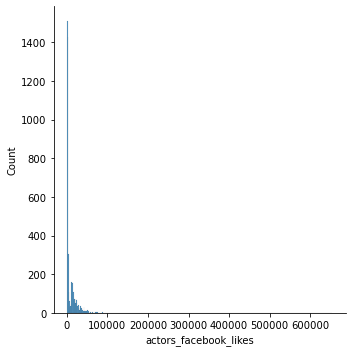

In [11]:
sns.displot(movies, x="actors_facebook_likes")

In [12]:
# If the actors have facebook likes greater than 75% of the others, they are famous (1) else not (0)
famous = movies['actors_facebook_likes'].quantile(0.7)
movies['actors_facebook_likes'] = movies['actors_facebook_likes'].apply(lambda x: 1 if x > famous else 0)

### Budget

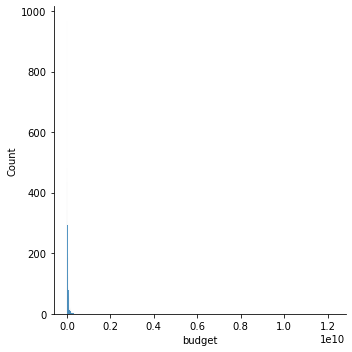

In [13]:
sns.displot(movies, x="budget")

In [14]:
movies.dropna(inplace = True)

## Check correlation

In [15]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681445
num_voted_users              0.437163
num_user_for_reviews         0.322559
duration                     0.301424
num_critic_for_reviews       0.283649
movie_facebook_likes         0.268881
director_facebook_likes      0.182985
gross                        0.182888
country_Others               0.100260
country_UK                   0.096814
actors_facebook_likes        0.092504
cast_total_facebook_likes    0.073699
actor_2_facebook_likes       0.066739
actor_1_facebook_likes       0.066040
actor_3_facebook_likes       0.045431
budget                       0.002025
aspect_ratio                -0.029805
facenumber_in_poster        -0.067898
country_USA                 -0.147556
title_year                  -0.148343
dtype: float64

# CREATING THE MODEL

In [16]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
# Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins = np.array([0,cutoff,1])
# Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index = {0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Model 1 (all predictors)

In [17]:
# creating a model using predictors with high correlation
logit_model1 = smf.logit(data = movies, formula = 'good_movie ~ duration + director_facebook_likes + country_UK + country_USA + country_Others + aspect_ratio + actors_facebook_likes + budget + facenumber_in_poster').fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.507292
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3747
Method:                           MLE   Df Model:                            8
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1270
Time:                        14:17:49   Log-Likelihood:                -1905.4
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.459e-114
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.4332        nan        nan        nan         nan  

Classification accuracy = 76.7%
Precision = 63.7%
TPR or Recall = 30.0%
FNR = 70.0%
FPR = 6.3%
ROC-AUC = 74.4%


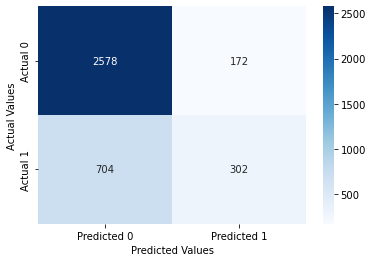

In [18]:
confusion_matrix_data(movies, movies.good_movie, logit_model1, cutoff = 0.46)

### Model 2

In [19]:
logit_model2 = smf.logit(formula= 'good_movie ~ duration + title_year + director_facebook_likes + actors_facebook_likes + budget', data = movies).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.522698
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3750
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1005
Time:                        14:17:49   Log-Likelihood:                -1963.3
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                 1.353e-92
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  48.3675      7.849      6.162      0.000      32.984   

Classification accuracy = 76.2%
Precision = 67.8%
TPR or Recall = 21.2%
FNR = 78.8%
FPR = 3.7%
ROC-AUC = 71.0%


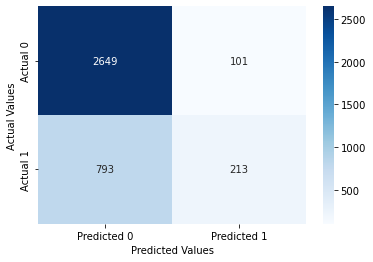

In [20]:
confusion_matrix_data(movies, movies.good_movie, logit_model2, cutoff = 0.49)

### Model 3

In [21]:
logit_model3 = smf.logit(formula= 'good_movie ~ duration + director_facebook_likes * actors_facebook_likes + budget + np.log(budget)', data = movies).fit()
print(logit_model3.summary())

Optimization terminated successfully.
         Current function value: 0.506078
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3749
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1291
Time:                        14:17:49   Log-Likelihood:                -1900.8
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.699e-118
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

In [22]:
from sklearn.metrics import precision_recall_curve, auc

y = movies.good_movie
y_pred = logit_model3.predict(movies)

precision, recall, thresholds = precision_recall_curve(y, y_pred)
pr_auc = auc(recall, precision)

max_precision_index = np.argmax(precision[:-1])
decision_threshold = thresholds[max_precision_index]

Classification accuracy = 74.9%
Precision = 81.4%
TPR or Recall = 8.3%
FNR = 91.7%
FPR = 0.7%
ROC-AUC = 75.2%


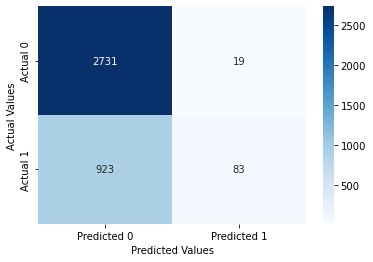

In [23]:
confusion_matrix_data(movies, movies.good_movie, logit_model3, cutoff = decision_threshold)

### Model 4

#### Best subset selection

In [24]:
np.random.seed(2)

# 75% to be training
train = movies.sample(round(movies.shape[0]*.75))
# drop the train data from the test df
test = movies.drop(train.index)

Optimization terminated successfully.
         Current function value: 0.542218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570571
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585886
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586548
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584432
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577354
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582216
         Iterations 5
Processed 8 models on 1 predictors in 0.026006221771240234 seconds.
Optimization terminated successfully.
         Current function value: 0.533914
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.523724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.528584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522012
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526845
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524012
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531514
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524350
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.533151
  

Optimization terminated successfully.
         Current function value: 0.526842
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524449
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.533103
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.532032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.529339
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530876
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.553211
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560196
  

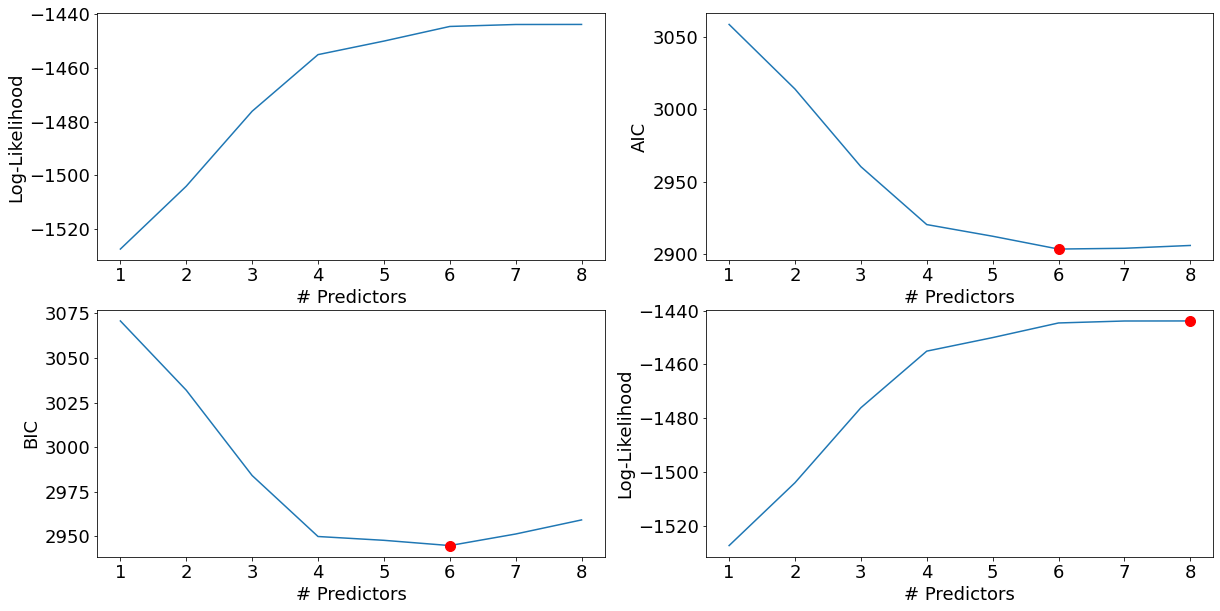

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['duration', 'director_facebook_likes', 'aspect_ratio', 'actors_facebook_likes', 'budget', 'facenumber_in_poster', 'country_USA', 'country_Others']]
y = train['good_movie']

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate log-likelihood
    model = sm.Logit(y, sm.add_constant(train[predictor_subset])).fit()
    log_likelihood = model.llf
    return {"model":model, "log_likelihood":log_likelihood}

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest log-likelihood
    best_model = models.loc[models['log_likelihood'].argmax()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["log_likelihood", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["log_likelihood"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log-Likelihood')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

    llf = models_best.apply(lambda row: row[1].llf, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(llf)
    plt.plot(1+llf.argmax(), llf.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('Log-Likelihood')

    plt.show()
    
best_sub_plots()

#### Forward stepwise selection

Optimization terminated successfully.
         Current function value: 0.542218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570571
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585886
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586548
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584432
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577354
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582216
         Iterations 5
Processed  8 models on 1 predictors in 0.02765488624572754 seconds.
Optimization terminated successfully.
         Current function value: 0.533914
         Iterations 6
Optimization t

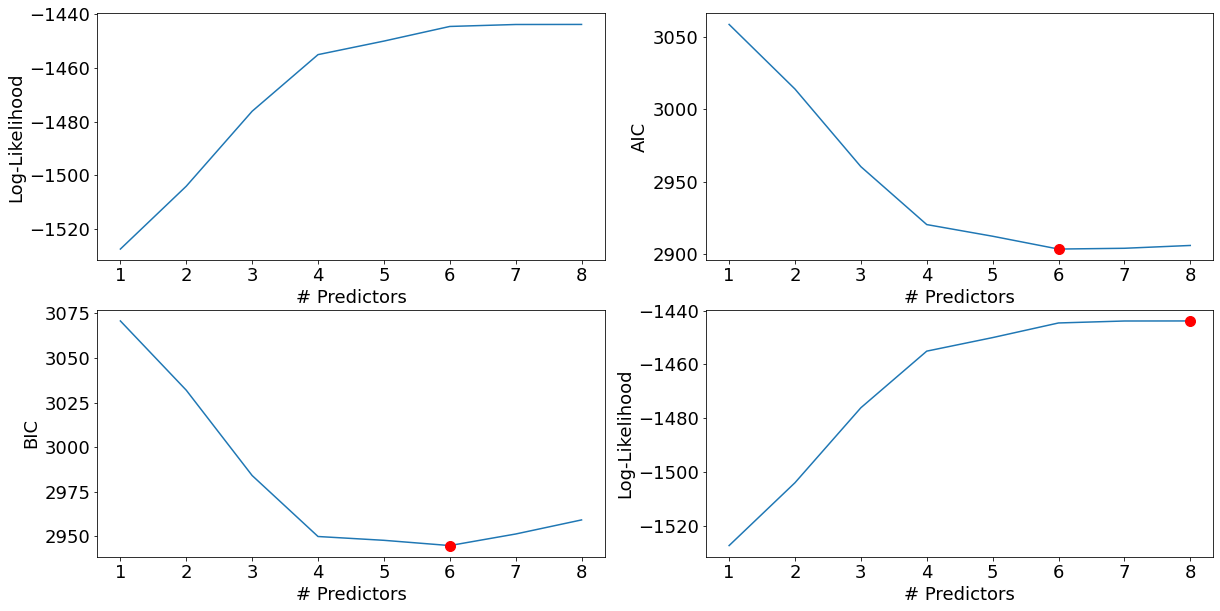

In [26]:
X = train[['duration', 'director_facebook_likes', 'aspect_ratio', 'actors_facebook_likes', 'budget', 'facenumber_in_poster', 'country_USA', 'country_Others']]

#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['log_likelihood'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model


def forward_selection():
    models_best = pd.DataFrame(columns=["log_likelihood", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

models_best = forward_selection()

best_sub_plots()

In [27]:
best_fwd_reg_model = models_best['model'][6]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             good_movie   No. Observations:                 2817
Model:                          Logit   Df Residuals:                     2810
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1257
Time:                        14:17:51   Log-Likelihood:                -1444.6
converged:                       True   LL-Null:                       -1652.3
Covariance Type:            nonrobust   LLR p-value:                 1.324e-86
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4845      0.409     -3.630      0.000      -2.286      -0.683
duration                    0.0320      0.002     13.361      0.000       0.027       0.037
director_facebook_likes     0.0001   1.54e-05      6.670      0.000    7.24e-05       0.000
country_USA                -0.8708      0.107     -8.137      0.000      -1.080      -0.661
aspect_ratio               -1.2026      0.179     -6.711      0.000      -1.554      -0.851
facenumber_in_poster       -0.0823      0.026     -3.141      0.002      -0.134      -0.031
actors_facebook_likes       0.3207      0.097      3.310      0.001       0.131       0.511
===========================================================================================
"""

In [28]:
logit_model4 = smf.logit(formula= 'good_movie ~ duration + director_facebook_likes + country_USA + aspect_ratio + facenumber_in_poster + actors_facebook_likes', data = train).fit()
print(logit_model4.summary())

Optimization terminated successfully.
         Current function value: 0.512811
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 2817
Model:                          Logit   Df Residuals:                     2810
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1257
Time:                        14:17:51   Log-Likelihood:                -1444.6
converged:                       True   LL-Null:                       -1652.3
Covariance Type:            nonrobust   LLR p-value:                 1.324e-86
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.4845      0.409     -3.630      0.000      -2.286   

Classification accuracy = 74.2%
Precision = 83.1%
TPR or Recall = 7.0%
FNR = 93.0%
FPR = 0.5%
ROC-AUC = 74.0%


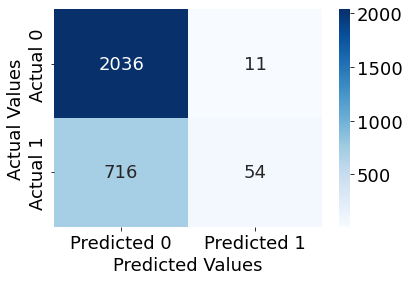

In [29]:
confusion_matrix_data(train, train.good_movie, logit_model4, cutoff = decision_threshold)

# Calculating Odds

In [30]:
math.exp(logit_model4.params['country_USA'])

0.41863621107487714

In [31]:
math.exp(logit_model4.params['aspect_ratio'])

0.3004005174162438

In [32]:
math.exp(logit_model4.params['actors_facebook_likes'])

1.3781516251929204